Data obsahujú údaje za tržby z roku 2013 pre 1559 produktov z desiatich rôznych obchodov. Obsahujú údaje o každom produkte a obchode.

Čielom je vedieť predpovedať predaj každeho produktu v každom obchode,aby prdajcovia môhli pochopiť dôležitosť jednotlivých parametrov produktov a môhli zvýšit prdajnosť.


Niektoré údaje môžu byť neuplné,(Niektoré obchody poskytovali len čiastočne informácie)

# Nacitanie knizníc

In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV,GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

from sklearn import metrics


import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


# Nacitanie a spracovanie dáť

In [27]:
#Read CSV
data_path = "data/"
data = pd.read_csv(data_path+'Big_mart.csv')


In [28]:
#Priklad dát
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Vlastnosti dát

1. Item_Identifier -unkátne číslo produktu
2. Item _Weight -vaha produktu
3. Item_Fat_Content -či je produkt s nizkym obsahom tuku alebo nie
4. Item_Visibility - nakolko je produkt viditelny v obchode
5. Item_Type  - categoria produktov
6. Item_MRP - Maximum Retail Price (list price) , maximalna maloobchodna cena
7. Outlet_identifier  - unikatne id obchodu
8. Outlet_Establishment_Year - Rok v ktorom bol obchod založeny
9. Outlet_size  - velkost obchodu
10. Outlet_Location_Type	 - Typ mesta v ktorom sa obchod nachadza
11. Outlet_Type -Typ obchodu,napr supermarket
12. Item_outlet sales - Predajnost,parameter ktory chceme predpovedat

In [29]:
#prvotná analýza
print('Tvar :',data.shape," Velkost ",data.size)
data.describe(include='all')


Tvar : (8523, 12)  Velkost  102276


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDG33,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [31]:
#sprava textovych vlastnosti

#Frekvencie jednotlivych textovych hodnôt okrem idčiek
features_text_cat_col = [x for x in data.dtypes.index 
                         if data.dtypes[x]=='object' and  
                         x not in ['Item_Identifier','Outlet_Identifier']]

for col in features_text_cat_col:
    print('Features',col)
    print(data[col].value_counts())
    print()
    
#pozorovania,možne chyby
#Problem 1. parameter ma zrejme duplikát v hodnotách (Low Fat == LF == low fat   )

    

Features Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Features Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Features Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Features Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Features Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket

In [33]:
#Problem 1
data['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
data['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
data['Item_Fat_Content'].replace('reg','Regular',inplace=True)
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

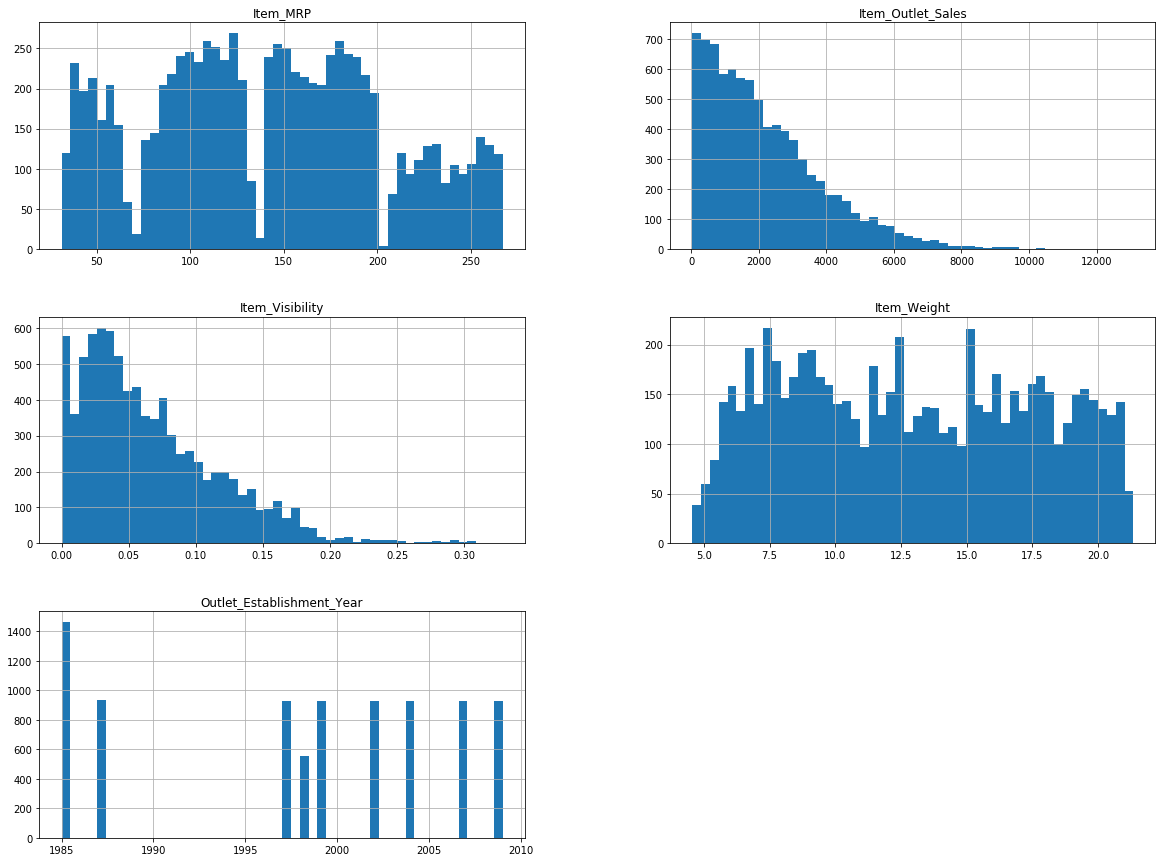

In [32]:
#histogram pre  numericke hodnoty
data.hist(bins=50, figsize=(20,15))
plt.show()
#Jednotlive hodnoty budeme musiet preskalovat(napr kvôli linearnej regresi)
#poznatky..vaha 12.5 velmi casto 
#Datum otvorenia obchodu by bolo lepšie pretransformovať na vek obchodu.



In [34]:
print(data["Item_Visibility"].describe())
#Problem 2, niektore prvky majú nastavený ItemVisibility na 0,čo je zrejme chybný údaj.
#Prvky nastavime podla priemeru zvysnych prvkov
itemIDVis = data.groupby('Item_Identifier').Item_Visibility.mean()
idemWithVisZero = data['Item_Visibility']==0
data.loc[idemWithVisZero,'Item_Visibility'] = itemIDVis[data.loc[idemWithVisZero, 'Item_Identifier']].values
print("Po uprave")
print(data["Item_Visibility"].describe())

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64
Po uprave
count    8523.000000
mean        0.069670
std         0.049810
min         0.003575
25%         0.031114
50%         0.056922
75%         0.097160
max         0.328391
Name: Item_Visibility, dtype: float64


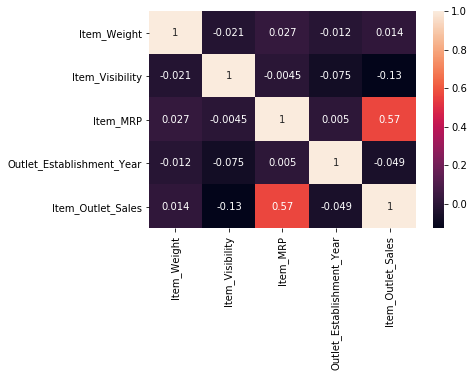

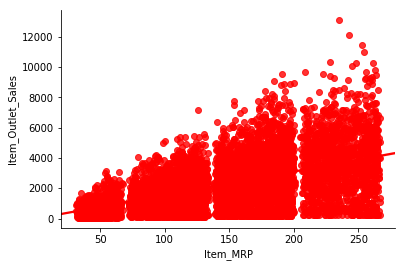

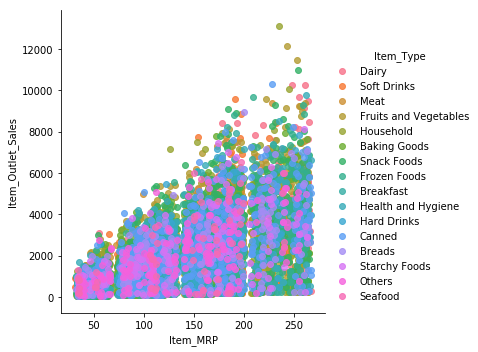

In [35]:
#Skumanie vstahu medzi parametrami navzajom
#Corelacia medzi numercikymi parametrami
cor = data.corr()
#vizualizacia
sns.heatmap(cor,annot=True)
plt.show()


#Vyzualizacia Item_MPR vs Item outtles sales
sns.regplot(x = 'Item_MRP',y = 'Item_Outlet_Sales', data = data,color = 'r')
sns.despine()

sns.lmplot(x = 'Item_MRP',y = 'Item_Outlet_Sales' ,hue = 'Item_Type', data=data , fit_reg = False)
sns.despine()


In [36]:
#Vytvorime atribút predajnost vs maximalna maloobchodna cena (Item_Outlet_Sales Item_MRP)
#udaje mali najvacsi spolocny korelacny koeficiet (0.57),rastli spolocne.
data["SoldMaxPrice"] = data["Item_Outlet_Sales"]/data["Item_MRP"]


#vytvorenie noveho atributu, v diskusi hackathonu sa dalo najst ze z IDtovaru sa da zistit typ
#Get the first two characters of ID:
data['Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2]).map(
                                                            {'FD':'food',
                                                             'NC':'nan-consue',
                                                             'DR':'drink'})
data['Type_Combined'].value_counts()


food          6125
nan-consue    1599
drink          799
Name: Type_Combined, dtype: int64

Text(0, 0.5, 'ITEM_OUTLET_SALES')

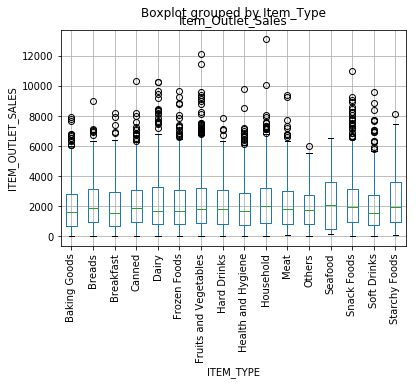

In [12]:
data.boxplot(column='Item_Outlet_Sales', by='Item_Type')
plt.xticks(rotation=90);
plt.xlabel('ITEM_TYPE')
plt.ylabel('ITEM_OUTLET_SALES')

# Feature Preprocessing


In [13]:
#Zistenie poctu null hodnôt a ich následé eliminovanie
data.isnull().sum()
#O niektorých produktoch nemáme informácie o váhe a velkosti
nans = lambda df: df[df.isnull().any(axis=1)]
print(nans(data).head())
#Zistili sme ze hodnoty null su nahodne,(Nepatria iba vybranemu druhu tovaru)

   Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
3            FDX07         19.2          Regular         0.015274   
7            FDP10          NaN          Low Fat         0.127470   
8            FDH17         16.2          Regular         0.016687   
9            FDU28         19.2          Regular         0.094450   
18           DRI11          NaN          Low Fat         0.034238   

                Item_Type  Item_MRP Outlet_Identifier  \
3   Fruits and Vegetables  182.0950            OUT010   
7             Snack Foods  107.7622            OUT027   
8            Frozen Foods   96.9726            OUT045   
9            Frozen Foods  187.8214            OUT017   
18            Hard Drinks  113.2834            OUT027   

    Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
3                        1998         NaN               Tier 3   
7                        1985      Medium               Tier 3   
8                        2002         NaN   

In [14]:
#Chybajuce hodnoty nahradime priemernymi
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)
#todo nevieme co doplnit
#print(data['Outlet_Size'].value_counts().)
data['Outlet_Size'].fillna('Medium',inplace=True)
print(data.isnull().sum())


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Type_Combined                0
dtype: int64


In [15]:
data['Outlet_Ages'] = datetime.datetime.now().year - data['Outlet_Establishment_Year']
data.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)


le = LabelEncoder()
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])

#Zmenime rozsah hodnôť pomocou standarScaller
scaler = StandardScaler()
columToScale = ['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales','Outlet_Ages','Outlet','SoldMaxPrice']
data[columToScale] = scaler.fit_transform(data[columToScale])
print(data.head())


#zmena textovzch parametrov na ciselne
data = pd.get_dummies(data, columns=['Item_Type','Type_Combined','Outlet_Location_Type',
                                     'Outlet_Size','Item_Fat_Content','Outlet_Type',
                                     'Outlet'])

#odstranenie nepotrebnych textovych udajov
data.drop(['Item_Identifier','Outlet_Identifier'],inplace=True,axis=1)

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15    -0.841872          Low Fat        -1.076606   
1           DRC01    -1.641706          Regular        -1.011737   
2           FDN15     1.098554          Low Fat        -1.062295   
3           FDX07     1.500838          Regular        -1.092138   
4           NCD19    -0.929428          Low Fat        -1.236526   

               Item_Type  Item_MRP Outlet_Identifier Outlet_Size  \
0                  Dairy  1.747454            OUT049      Medium   
1            Soft Drinks -1.489023            OUT018      Medium   
2                   Meat  0.010040            OUT049      Medium   
3  Fruits and Vegetables  0.660050            OUT010      Medium   
4              Household -1.399220            OUT013        High   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales Type_Combined  \
0               Tier 1  Supermarket Type1           0.910601          food   
1               Tier 3  Su

In [16]:
X=data.drop(['Item_Outlet_Sales'],axis=1)
Y=data['Item_Outlet_Sales']
#Rozdelime data na trenovacie, podla random seedu.
def splitData():
    return train_test_split(X,Y,test_size=0.20,random_state=10)

# Linearna regresia


In [17]:
xTrain,xTest,yTrain,yTest = splitData()

linearRegresion= LinearRegression()
linearRegresion.fit(xTrain,yTrain)

linScore = linearRegresion.score(xTest,yTest)
print("SCORE: ",linScore)
linError = np.sqrt(metrics.mean_squared_error(yTest,linearRegresion.predict(xTest)))
print("Root mean square error :",linError)


SCORE:  0.574438115554494
Root mean square error : 0.658662170099382


# SVM regresia

In [18]:
xTrain,xTest,yTrain,yTest = splitData()

svmRegresion= SVR()
svmRegresion.fit(xTrain,yTrain)

svmScore = linearRegresion.score(xTest,yTest)
print("SCORE: ",svmScore)
svmError = np.sqrt(metrics.mean_squared_error(yTest,svmRegresion.predict(xTest)))
print("Root mean square error :",svmError)


SCORE:  0.574438115554494
Root mean square error : 0.6313114001746144


# RandomForest Regresia

In [19]:
xTrain,xTest,yTrain,yTest = splitData()
randomForestRegresion = RandomForestRegressor()
randomForestRegresion.fit(xTrain, yTrain)

print("SCORE: ",randomForestRegresion.score(xTest,yTest))
rfError = np.sqrt(metrics.mean_squared_error(yTest,randomForestRegresion.predict(xTest)))
print("Root mean square error :",rfError)


#vyskusame GridSearchCV na najdenie najlepsich parametrov
grid_para={'n_estimators':[50,100,500,1200],'max_depth':[16,32,40,50,64,80]}
gridSCV=GridSearchCV(RandomForestRegressor(),grid_para)

gridSCV.fit(xTrain,yTrain)
#print("SCORE: ",gridSCV.score(xTest,yTest))
print(gridSCV.best_params_)

randomForestRegresion = RandomForestRegressor(max_depth= 32, n_estimators= 50)
randomForestRegresion.fit(xTrain, yTrain)

rfScore = randomForestRegresion.score(xTest,yTest)
print("SCORE po grid search: ",rfScore)
rfError = np.sqrt(metrics.mean_squared_error(yTest,randomForestRegresion.predict(xTest)))
print("Root mean square error po gridsearch :",rfError)

SCORE:  0.539975239325365
Root mean square error : 0.6848129479196334
{'max_depth': 16, 'n_estimators': 500}
SCORE po grid search:  0.5633404716872261
Root mean square error po gridsearch : 0.6671950716868349


# BaggingRegressor

In [20]:
xTrain,xTest,yTrain,yTest = splitData()
baggingRegresion= BaggingRegressor()
baggingRegresion.fit(xTrain, yTrain)

bgScore = baggingRegresion.score(xTest,yTest)
print("SCORE: ",bgScore)
bgError = np.sqrt(metrics.mean_squared_error(yTest,baggingRegresion.predict(xTest)))
print("Root mean square error :",bgError)


#grid_para={'n_estimators':[50,100,150,200,500],
#           'max_samples':[0.5,1,2,4,8,50,100], 'max_features':[1,2,4,8,10,12]
#          }
#gridSCV=GridSearchCV(BaggingRegressor(),grid_para)

#gridSCV.fit(xTrain,yTrain)
#print("SCORE: ",gridSCV.score(xTest,yTest))
#print(gridSCV.best_params_)




SCORE:  0.5160472494088433
Root mean square error : 0.702397311028031


#  GradientBoostingRegressor

In [21]:
xTrain,xTest,yTrain,yTest = splitData()
gradientBoostingRegresion = GradientBoostingRegressor()
gradientBoostingRegresion.fit(xTrain, yTrain)

gbScore = gradientBoostingRegresion.score(xTest,yTest)
print("SCORE: ",gbScore)
gbError = np.sqrt(metrics.mean_squared_error(yTest,gradientBoostingRegresion.predict(xTest)))
print("Root mean square error :",gbError)


SCORE:  0.6027502560075764
Root mean square error : 0.6363750908162744


# Lasso

In [22]:
xTrain,xTest,yTrain,yTest = splitData()

lassoRegresion = linear_model.LassoCV(cv=5,normalize=True,random_state=10,alphas=[.0005])
lassoRegresion.fit(xTrain, yTrain)

#print(lassoRegresion.intercept_)

lassoScore = lassoRegresion.score(xTest,yTest)
print("SCORE: ",lassoScore)
lassoError = np.sqrt(metrics.mean_squared_error(yTest,lassoRegresion.predict(xTest)))
print("Root mean square error :",lassoError)

SCORE:  0.5661709516154094
Root mean square error : 0.6650291364011864


# Adaptive Boost

In [23]:
xTrain,xTest,yTrain,yTest = splitData()

adaBoostRegresion = AdaBoostRegressor(n_estimators=100,loss="linear",learning_rate=.005)
adaBoostRegresion.fit(xTrain, yTrain)

adaScore = adaBoostRegresion.score(xTest,yTest)
print("SCORE: ",adaScore)
adaError = np.sqrt(metrics.mean_squared_error(yTest,adaBoostRegresion.predict(xTest)))
print("Root mean square error :",adaError)

SCORE:  0.5221977046892695
Root mean square error : 0.6979197283920323


# Vyhodnotenie

Najmensia root squere chyba =  0.6313114001746144


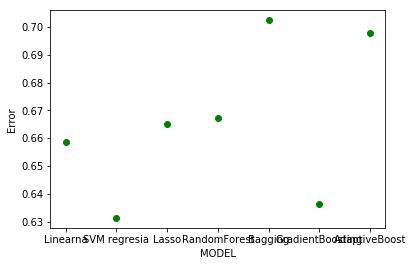

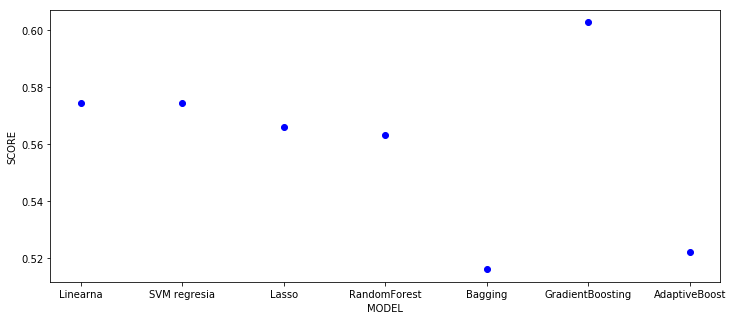

In [24]:
RegName= ['Linearna','SVM regresia','Lasso','RandomForest','Bagging','GradientBoosting','AdaptiveBoost']
error = [linError,svmError,lassoError,rfError,bgError,gbError,adaError]
score = [linScore,svmScore,lassoScore,rfScore,bgScore,gbScore,adaScore]
print("Najmensia root squere chyba = ", min(error))
plt.plot(RegName,error,'go')
plt.rcParams['figure.figsize'] = [12, 5]
plt.xlabel('MODEL')
plt.ylabel('Error')
plt.show()

plt.plot(RegName,score,'bo')
plt.xlabel('MODEL')
plt.ylabel('SCORE')
plt.show()

Snažil som sa čo najlepšie pochopiť data, vyčištit ich, upraviť, vytvoriť nové vlastnosti a následne natrénovať rôzne modely. Pri dvoch najlepších modeloch RadomForrest a Boost modely Bagging som použil aj Grid Search na najdenie najlepšich parametrov.

Pri skúmanom množstve dáť a počtu atributov bol čas u všetkých algoritmov zanedbateplný, resp každý model sa natrénoval do 20 sekúnd.

Najlepšie scóre sme dosiahli pomocou BaggingRegresion (Bootstrap aggregating) ktory default využíva rozhodovacie stromy.


https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html
https://en.wikipedia.org/wiki/Bootstrap_aggregating


Pri projekte som čerpal pomocne materialy z knihy Hands-Machine-Learning, a marerialov na predmet 2-INF-150: Machine learning (Strojové učenie) 
https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291